## Popup Bouy (underice buoys)

*POC:* 
- Dan Langis 
- Shaun Bell

The following scripts generate figures for the upcomming publication.
This is to capture most of the look and feel, follow-up editing happens in Adobe Illustrator

In [87]:
import os
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [155]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.linewidth'] = 0.25
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'

### Data Ingestion: from xlsx files.

There are three seperate sample period distinctions
- at bottom
- profiles
- at surface   
These have been place in seperate tabs in the respective excel files

In [55]:
# data path
dr = '/Users/bell/ecoraid/2017/Additional_FieldData/Popup_Buoys/raw/'
fd = os.listdir(dr)


Text(0,0.5,'PAR ($\\mu$mol m-2 s-1)')

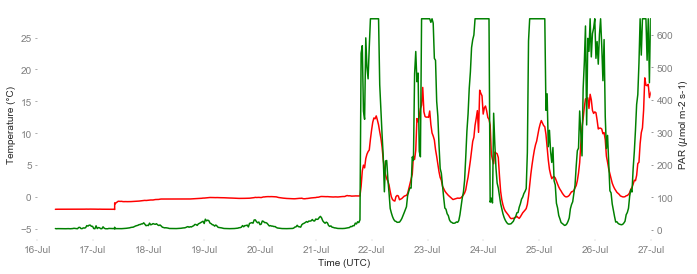

In [104]:
# Prototype-A Plot
df_protA = pd.read_excel(dr + 'Pop-Up Prototype A - ic01-14068.xlsx',
                                  sheet_name='ic01-14068',
                                  date_parser=True, 
                                  index_col='Date(UTC)')

fig, ax = plt.subplots(figsize=(11, 4.25))
cs = ax.plot(df_protA.index, df_protA['Temperature(C)'],'r',label=fn.split('.xlsx')[0])
ax2 = ax.twinx()
cs = ax2.plot(df_protA.index, df_protA['PAR (umol)'],'g',label=fn.split('.xlsx')[0])
ax.set_xlim([datetime.datetime(2015,7,16),datetime.datetime(2015,7,27)])

xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
ax.xaxis.set_major_formatter(xfmt)

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (°C)') 
ax2.set_ylabel('PAR ($\mu$mol m-2 s-1)') 

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx
Likely no Unit Time Column: ~$Pop Up 003 - March 10 Release.xlsx


Text(0,0.5,'Temperature (°C)')

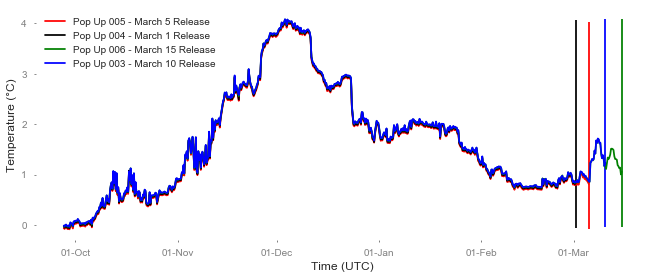

In [157]:
#bottom
df_b = {}

colors = ['b','k','r','b','g','k','g','b']
fig, ax = plt.subplots(figsize=(11, 4.25))

for c,fn in enumerate(fd):
    if fn not in ['.DS_Store',]:
        try:
            df_b.update({fn:pd.read_excel(dr + fn,sheet_name='Bottom',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            
            cs = ax.plot(df_b[fn].index, df_b[fn]['Temperature (°C)'],colors[c],label=fn.split('.xlsx')[0])
            cs = ax.vlines(df_b[fn].index[-1],df_b[fn]['Temperature (°C)'].min(),df_b[fn]['Temperature (°C)'].max(),colors[c])

            xfmt = mdates.DateFormatter('%d-%b')
            ax.xaxis.set_major_formatter(xfmt)

        except:
            print("Likely no Unit Time Column: {}".format(fn))

ax.legend(loc='upper left')            
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (°C)')     

**All Bottom timeseries on same plot**

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx
Likely no Unit Time Column: ~$Pop Up 003 - March 10 Release.xlsx


Text(0.5,0,'Temperature (°C)')

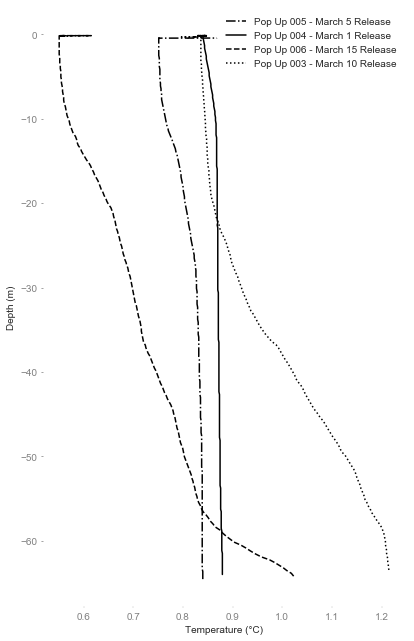

In [134]:
#profiles
df_p = {}

fig, ax = plt.subplots(figsize=(6.5,11))

lt= ['-','--','-.','-',':','-','--',':','-']

for c,fn in enumerate(fd):
    if fn not in ['.DS_Store',]:
        try:
            df_p.update({fn:pd.read_excel(dr + fn,
                                  sheet_name='Profile',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            
            cs = ax.plot(df_p[fn]['Temperature (°C)'], df_p[fn]['10 Bar Pressure Sensor (m)'],'k',linestyle=lt[c],label=fn.split('.xlsx')[0])

        except:
            print("Likely no Unit Time Column: {}".format(fn))
            
ax.legend(loc='upper right')            
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Temperature (°C)')      

In [37]:
#surface
df_s = {}

for fn in fd:
    if fn not in ['.DS_Store',]:
        try:
            df_s.update({fn:pd.read_excel(dr + fn,
                                  sheet_name='Surface',
                                  date_parser=True, 
                                  index_col='Unit Time')})
            #df_s[fn].plot()
        except:
            print("Likely no Unit Time Column: {}".format(fn))
            
     

Likely no Unit Time Column: Pop-Up Prototype A - ic01-14068.xlsx
Likely no Unit Time Column: Pop-Up Prototype B - ic01-14069.xlsx
Likely no Unit Time Column: ~$Pop Up 003 - March 10 Release.xlsx


Text(0,0.5,'PAR ($\\mu$mol m-2 s-1)')

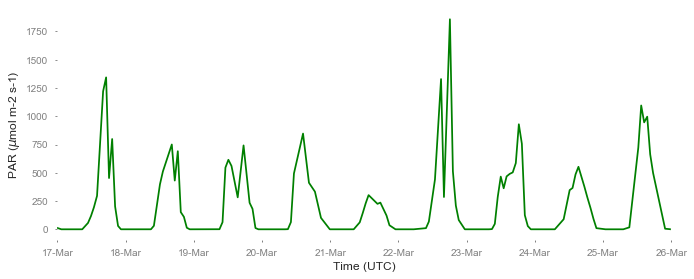

In [156]:
fig, ax = plt.subplots(figsize=(11, 4.25))
cs = ax.plot(df_s['Pop Up 004 - March 1 Release.xlsx'].index,df_s['Pop Up 004 - March 1 Release.xlsx']['PAR       (mmolm-2s-1)'],'g',label=fn.split('.xlsx')[0])

ax.set_xlim([datetime.datetime(2018,3,17),datetime.datetime(2018,3,26)])

xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
ax.xaxis.set_major_formatter(xfmt)

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('PAR ($\mu$mol m-2 s-1)') 